In [1]:
import csv
csv.register_dialect('piper', delimiter='|', quoting=csv.QUOTE_NONE)

with open('sample_file/documents.csv', "r", encoding='UTF-8') as csvfile:
    documents = [row for row in csv.DictReader(csvfile, dialect='piper')]
csvfile.close()

In [2]:
from method import *

In [3]:
morpheme_sentence_list_by_id = get_morpheme_sentence(documents)

In [4]:
tf_all = get_tf(morpheme_sentence_list_by_id)

import numpy as np

def convert_content_to_tf_num(morpheme_sentence: str):
    return np.array([tf_all[key][morpheme] for morpheme in morpheme_sentence])

digit_for_graph = {}
for key in morpheme_sentence_list_by_id:
    for morpheme_sentence in morpheme_sentence_list_by_id[key]:
        digit_for_graph[key] = convert_content_to_tf_num(morpheme_sentence)

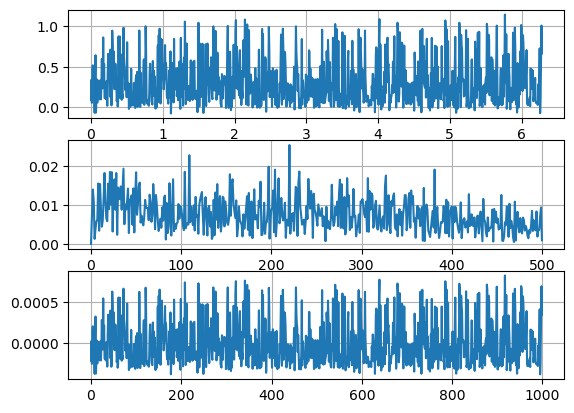

501


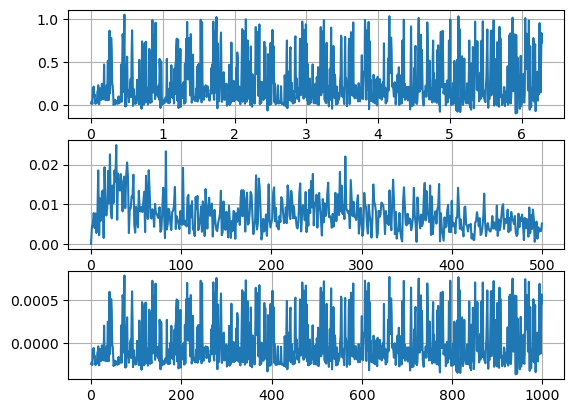

501


In [5]:
first_fft_ifft(digit_for_graph['10'])
first_fft_ifft(digit_for_graph['11'])

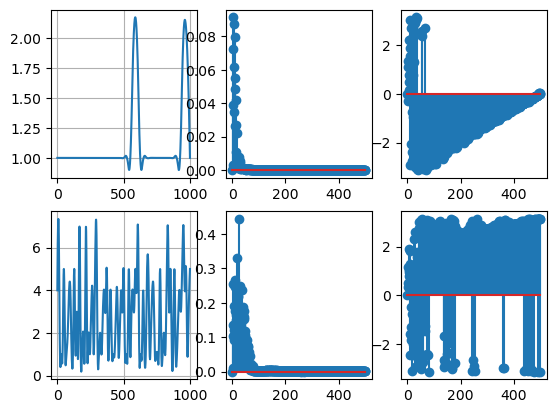


0 0.0 0.0
1 0.038847278048459034 0.10457295961633939
2 0.0724940157876815 0.13485038504440058
3 0.0913798912478065 0.254071086444137
4 0.0027218910335718625 0.01187243329904131
5 0.08725571665298083 0.09268571488068388
6 0.06163464154220399 0.12147330092055873
7 0.03461508865495691 0.1918957056946569
8 0.07941869278673212 0.24483342420515922
9 0.02630068565972846 0.2672582005188822
10 0.04854752264623376 0.13890810340309745
11 0.05506319591745289 0.17723237174688888
12 0.0026068432762800077 0.17626542617251223
13 0.041777156621779284 0.15086878338723456
14 0.026890722470163116 0.16490216256756976
15 0.010791966879991463 0.18907510686524934
16 0.022375507628119694 0.1375285048782546
17 0.007424793027206078 0.1860612999049866
18 0.00547637870385674 0.3290874275742021
19 0.004121385001313206 0.06457660348835585
20 0.0012674157249542514 0.12195992706008774
21 0.003992036465655386 0.22002117153065934
22 0.004100998430824371 0.21671419305462417
23 0.003130207364636953 0.19207018784210295
24

In [6]:
x = np.linspace(0, 2*np.pi, 100)
t1, signal1 = interpolate_1(digit_for_graph['13'])
t2, signal2 = interpolate_1(digit_for_graph['1'])

fft1 = np.fft.rfft(signal1) / len(signal1)
fft1[0] = 0
amplitude1 = abs(fft1)
# print(amplitude)
frequency = np.fft.fftfreq(len(fft1), len(signal1))
plt.subplot(2,3,1)
plt.plot( signal1)
plt.grid()
plt.subplot(2,3,2)
plt.stem( amplitude1)
plt.subplot(2,3,3)
angle1 = np.angle(fft1)
plt.stem(angle1 )

fft2 = np.fft.rfft(signal2) / len(signal2)
fft2[0] = 0
amplitude2 = abs(fft2)
# print(amplitude)
frequency = np.fft.fftfreq(len(fft2), len(signal2))
plt.subplot(2,3,4)
plt.plot( signal2)
plt.grid()
plt.subplot(2,3,5)
plt.stem( amplitude2)
plt.subplot(2,3,6)
angle2 = np.angle(fft2)
plt.stem( angle2)

plt.show()

print()
for i in range(len(amplitude1)):
    print(i, amplitude1[i], amplitude2[i])

print()
for i in range(len(angle2)):
    print(i, angle1[i], angle2[i])

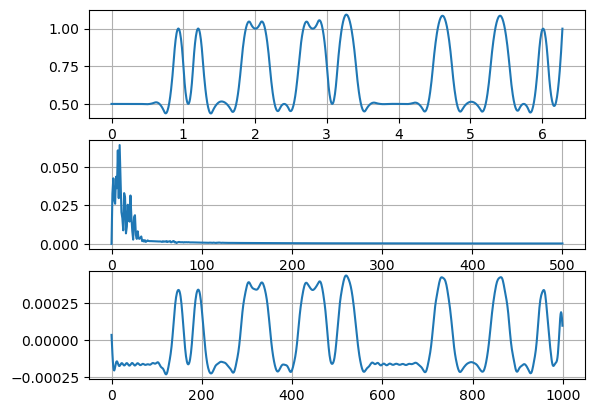

501


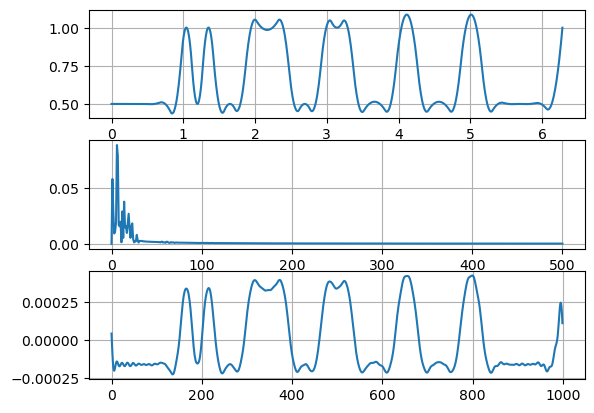

501


In [7]:
x = np.linspace(0, 2*np.pi, 100)
first_fft_ifft(digit_for_graph['3'])
first_fft_ifft(digit_for_graph['7'])

In [8]:

def c2(s1, s2):
    a = correlate(
        fft_result(interpolate_1(s1)[1])[1],
        fft_result(interpolate_1(s2)[1])[1])
    b = correlate(
        fft_result(interpolate_1(s1)[1])[2],
        fft_result(interpolate_1(s2)[1])[2])
    return a,b


In [9]:
# c2(digit_for_graph['22'], digit_for_graph['29'])
print(digit_for_graph['7'])
print(digit_for_graph['3'])

[1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2 2 1 1 1 1 2 2 1 1
 1 1 1 1 1 2]
[1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 2 2 1 1 1 2 1 2]


('5', '8')
PearsonRResult(statistic=0.9990812209843042, pvalue=0.0)
PearsonRResult(statistic=0.7167741198251938, pvalue=3.6692176378358e-80)
('3', '4')
PearsonRResult(statistic=0.9984436949750395, pvalue=0.0)
PearsonRResult(statistic=-0.09778348155917238, pvalue=0.028635361516692364)
('6', '7')
PearsonRResult(statistic=0.9978233636198625, pvalue=0.0)
PearsonRResult(statistic=0.8308161284234723, pvalue=4.347098626903307e-129)
('6', '8')
PearsonRResult(statistic=0.9964075460072913, pvalue=0.0)
PearsonRResult(statistic=0.752302522695524, pvalue=1.7358791524545358e-92)
('5', '6')
PearsonRResult(statistic=0.9957255592861222, pvalue=0.0)
PearsonRResult(statistic=0.7594592446445612, pvalue=3.1638836092060425e-95)
('6', '9')
PearsonRResult(statistic=0.9953297995178402, pvalue=0.0)
PearsonRResult(statistic=0.6557664925270466, pvalue=6.605615453397282e-63)
('7', '8')
PearsonRResult(statistic=0.9949586535374011, pvalue=0.0)
PearsonRResult(statistic=0.8072042456918788, pvalue=2.513912155525242e-11

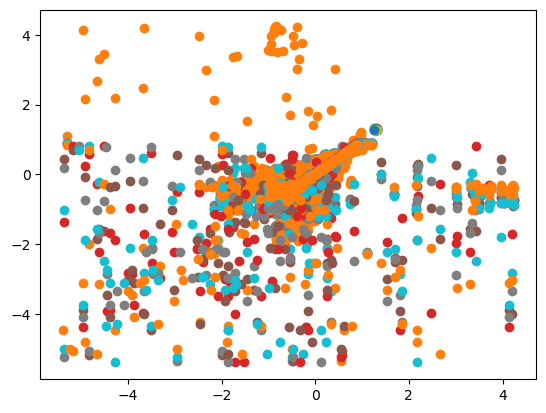

In [10]:
from itertools import combinations, permutations

nums = list(digit_for_graph.keys())[2:9]
rank = []
ll = list(combinations(nums, 2))
for i in ll:
    # print(i)
    a, b = c2(digit_for_graph[i[0]], digit_for_graph[i[1]])
    rank.append([i,a,b])

rank = sorted(rank, key=lambda ele: ele[1][0], reverse=True)
for i in rank:
    for j in i:
        print(j)

2.023844264096283 3.0885689699611922
0.09492707642506065 0.06134840269945623
0.1022857466477325 0.12568951357299057
0.20745251604271434 0.11700536948802848
0.09989885681827976 0.09302470602185559
0.11972549060653129 0.35414661904362266
0.15406512044264792 0.27630393013166
0.005176332590218444 0.20548059815761918
0.14831864784491064 0.14559504340146204
0.013048207970058342 0.14966178624139675
0.03206477993573105 0.24460407864373357
0.06794404084874121 0.3723381475579556
0.07459639849390459 0.2481159528619034
0.10050216092088583 0.19613196344271971
0.2699068469740018 0.5473573045376979
0.11875416888244324 0.25561229741253
0.14950326770357034 0.07928693768152689
0.11517980651330056 0.24826438926839783
0.1263104947142514 0.23026056253078528
0.09504991806294494 0.11246137099383775
0.033183790760265314 0.1831021925018533
0.09045268523006945 0.08818617019851353
0.05597940818685211 0.015628817268146494
0.15854522717932404 0.2861227575283638
0.02475834491771662 0.12323982481350035
0.09510801646

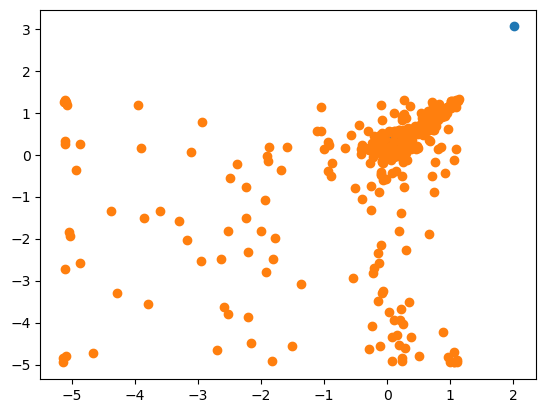

In [16]:
c2(digit_for_graph['39'], digit_for_graph['40'])


for a, b in zip(fft_result(interpolate_1(digit_for_graph['39'])[1])[1], fft_result(interpolate_1(digit_for_graph['40'])[1])[1]):
    print(a, b)
